In [1]:
import pandas as pd

df = pd.read_csv('cluster-receptiveness-homophily.csv')

df.head()

,homophily,prop_covert,receptivity,timestep,trial_idx
0,0.0,0.52,0.0,0,0
1,0.0,0.48,0.0,1,1
2,0.0,0.51,0.0,2,2
3,0.0,0.46,0.0,3,3
4,0.0,0.47,0.0,4,4


/Users/mt/Library/Python/3.7/lib/python/site-packages/IPython/core/pylabtools.py:132: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


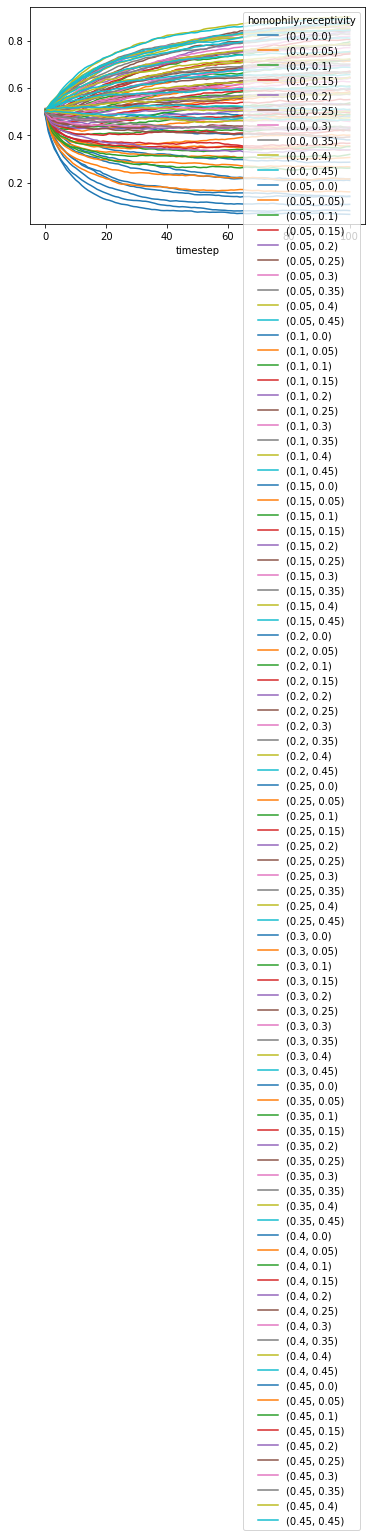

In [2]:
gb_mean = df.groupby(['homophily', 'receptivity', 'timestep']
                     )['prop_covert'].mean()

means = gb_mean.unstack(level=(0,1))

means.plot()

In [3]:
homophilies = [0.1, 0.25, 0.4]
receptivities = [0.1, 0.25, 0.4]

df_lim = df[df.homophily.isin(homophilies) & df.receptivity.isin(receptivities)]

In [4]:
df_lim.head()
len(df_lim)

90900

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


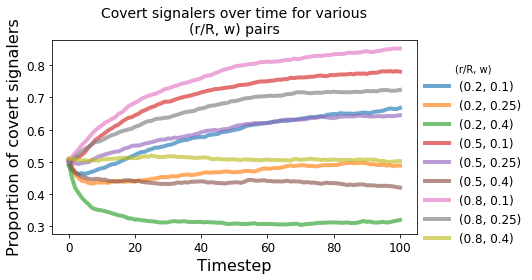

In [27]:
df_lim = df_lim = df[df.homophily.isin(homophilies) & df.receptivity.isin(receptivities)]
df_lim['receptivity'] = df_lim.receptivity / 0.5  

gb_mean = df_lim.groupby(['receptivity', 'homophily', 'timestep']
                     )['prop_covert'].mean()

# co

means = gb_mean.unstack(level=(0,1))


# plt.figure(figsize=(8, 4))
means.plot(lw=4, alpha=0.65, figsize=(7.5, 4))

plt.legend(bbox_to_anchor= (1.01, 0.9), ncol=1, title='(r/R, w)',
            borderaxespad=0, frameon=False, prop={'size': 12})
plt.xticks(size=12)
plt.yticks(size=12)
plt.ylabel('Proportion of covert signalers', size=16)
plt.xlabel('Timestep', size=16)
plt.title('Covert signalers over time for various\n(r/R, w) pairs', size=14)
plt.savefig('/Users/mt/workspace/id-sig/reports/Figures/exampleMidrangeSeries.pdf')

Text(6.800000000000004, 0.5, 'Receptivity')

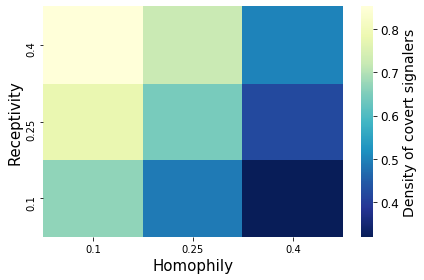

In [6]:
means.head()
means.index == 100
final_means = means[means.index == 100]

ax = sns.heatmap(final_means.stack(), cmap='YlGnBu_r',
                cbar_kws={'label': 'Density of covert signalers'})

# Set size of colorbar title.
ax.figure.axes[-1].yaxis.label.set_size(14)

# Set size of colorbar tick labels.
ax.collections[0].colorbar.ax.tick_params(labelsize=12)

# Clean up some other things.
ax.invert_yaxis()
ax.set_yticklabels(['0.1', '0.25', '0.4'])
ax.set_xlabel('Homophily', size=15)
ax.set_ylabel('Receptivity', size=15)

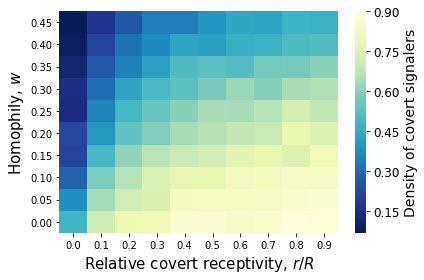

In [17]:
# Now that we know this works, let's scale up.

gb_mean = df.groupby(['receptivity', 'homophily', 'timestep']
                     )['prop_covert'].mean()

means = gb_mean.unstack(level=(0,1))

means.head()
means.index == 100
final_means = means[means.index == 100]

ax = sns.heatmap(final_means.stack(), cmap='YlGnBu_r',
                cbar_kws={'label': 'Density of covert signalers'})

# Set size of colorbar title.
ax.figure.axes[-1].yaxis.label.set_size(14)

# Set size of colorbar tick labels.
ax.collections[0].colorbar.ax.tick_params(labelsize=12)

# Clean up some other things.
ax.invert_yaxis()
# ax.set_yticklabels(['0.1', '0.25', '0.4'])
ax.set_ylabel('Homophily, $w$', size=15)
ax.set_xlabel('Relative covert receptivity, $r/R$', size=15)


relative_receptivity = df.receptivity.unique() / 0.5
relative_receptivity.sort()
ax.set_xticklabels(relative_receptivity)
ax.set_yticklabels([f'{y:.2f}' for y in np.arange(0, 0.46, 0.05)])

plt.savefig(
'/Users/mt/workspace/id-sig/reports/Figures/covertDensityVsReceptivityHomophily.pdf'
)